In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Fraud_check.csv")

In [3]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

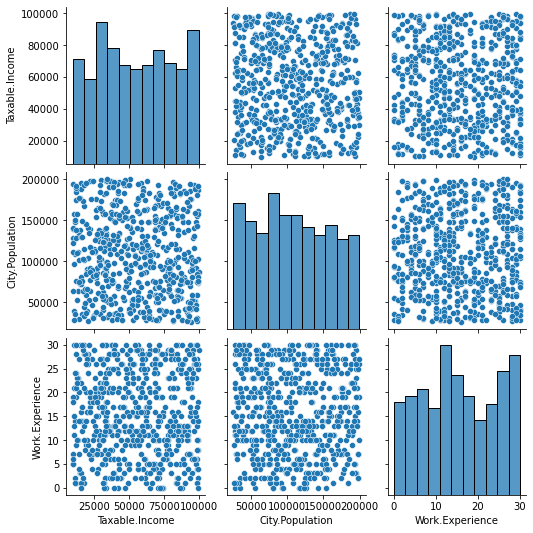

In [6]:
import seaborn as sns
sns.pairplot(df)

In [7]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [8]:
df1 = pd.get_dummies(df)

In [9]:
df1

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,68833,50047,10,1,0,0,0,1,0,1
1,33700,134075,18,0,1,1,0,0,0,1
2,36925,160205,30,1,0,0,1,0,0,1
3,50190,193264,15,0,1,0,0,1,0,1
4,81002,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
595,76340,39492,7,0,1,1,0,0,0,1
596,69967,55369,2,0,1,1,0,0,0,1
597,47334,154058,0,1,0,1,0,0,0,1
598,98592,180083,17,0,1,0,1,0,1,0


In [10]:
df2= df1['Taxable.Income'].values
ps=[]
for i in df2:
    if i<=30000:
        ps.append("risky")
    else:
        ps.append('good')
print(ps)

['good', 'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good', 'risky', 'good', 'risky', 'good', 'good', 'good', 'risky', 'good', 'good', 'risky', 'good', 'risky', 'good', 'good', 'good', 'good', 'good', 'good', 'risky', 'good', 'good', 'good', 'good', 'good', 'risky', 'good', 'risky', 'good', 'risky', 'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good', 'risky', 'good', 'good', 'good', 'good', 'risky', 'good', 'risky', 'good', 'good', 'risky', 'good', 'good', 'risky', 'good', 'good', 'good', 'good', 'good', 'good', 'risky', 'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good', 'risky', 'good', 'good', 'good', 'good', 'good', 'risky', 'good', 'risky', 'good', 'risky', 'good', 'good', 'good', 'risky', 'risky', 'good', 'risky', 'good', 'risky', 'good', 'good', 'good', 'good', 'good', 'good', 'good', 'risky', 'good', 'good', 'good', 'risky', 'good', 'good', 'good', 'risky', 'good', 'good', 'good', 'risky', 'good', 'good', 'ris

In [11]:
df1['check'] = ps

In [12]:
df1

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES,check
0,68833,50047,10,1,0,0,0,1,0,1,good
1,33700,134075,18,0,1,1,0,0,0,1,good
2,36925,160205,30,1,0,0,1,0,0,1,good
3,50190,193264,15,0,1,0,0,1,0,1,good
4,81002,27533,28,1,0,0,1,0,1,0,good
...,...,...,...,...,...,...,...,...,...,...,...
595,76340,39492,7,0,1,1,0,0,0,1,good
596,69967,55369,2,0,1,1,0,0,0,1,good
597,47334,154058,0,1,0,1,0,0,0,1,good
598,98592,180083,17,0,1,0,1,0,1,0,good


In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le = LabelEncoder()

In [15]:
df1['check'] = le.fit_transform(df1['check'])

In [16]:
df1

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES,check
0,68833,50047,10,1,0,0,0,1,0,1,0
1,33700,134075,18,0,1,1,0,0,0,1,0
2,36925,160205,30,1,0,0,1,0,0,1,0
3,50190,193264,15,0,1,0,0,1,0,1,0
4,81002,27533,28,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
595,76340,39492,7,0,1,1,0,0,0,1,0
596,69967,55369,2,0,1,1,0,0,0,1,0
597,47334,154058,0,1,0,1,0,0,0,1,0
598,98592,180083,17,0,1,0,1,0,1,0,0


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

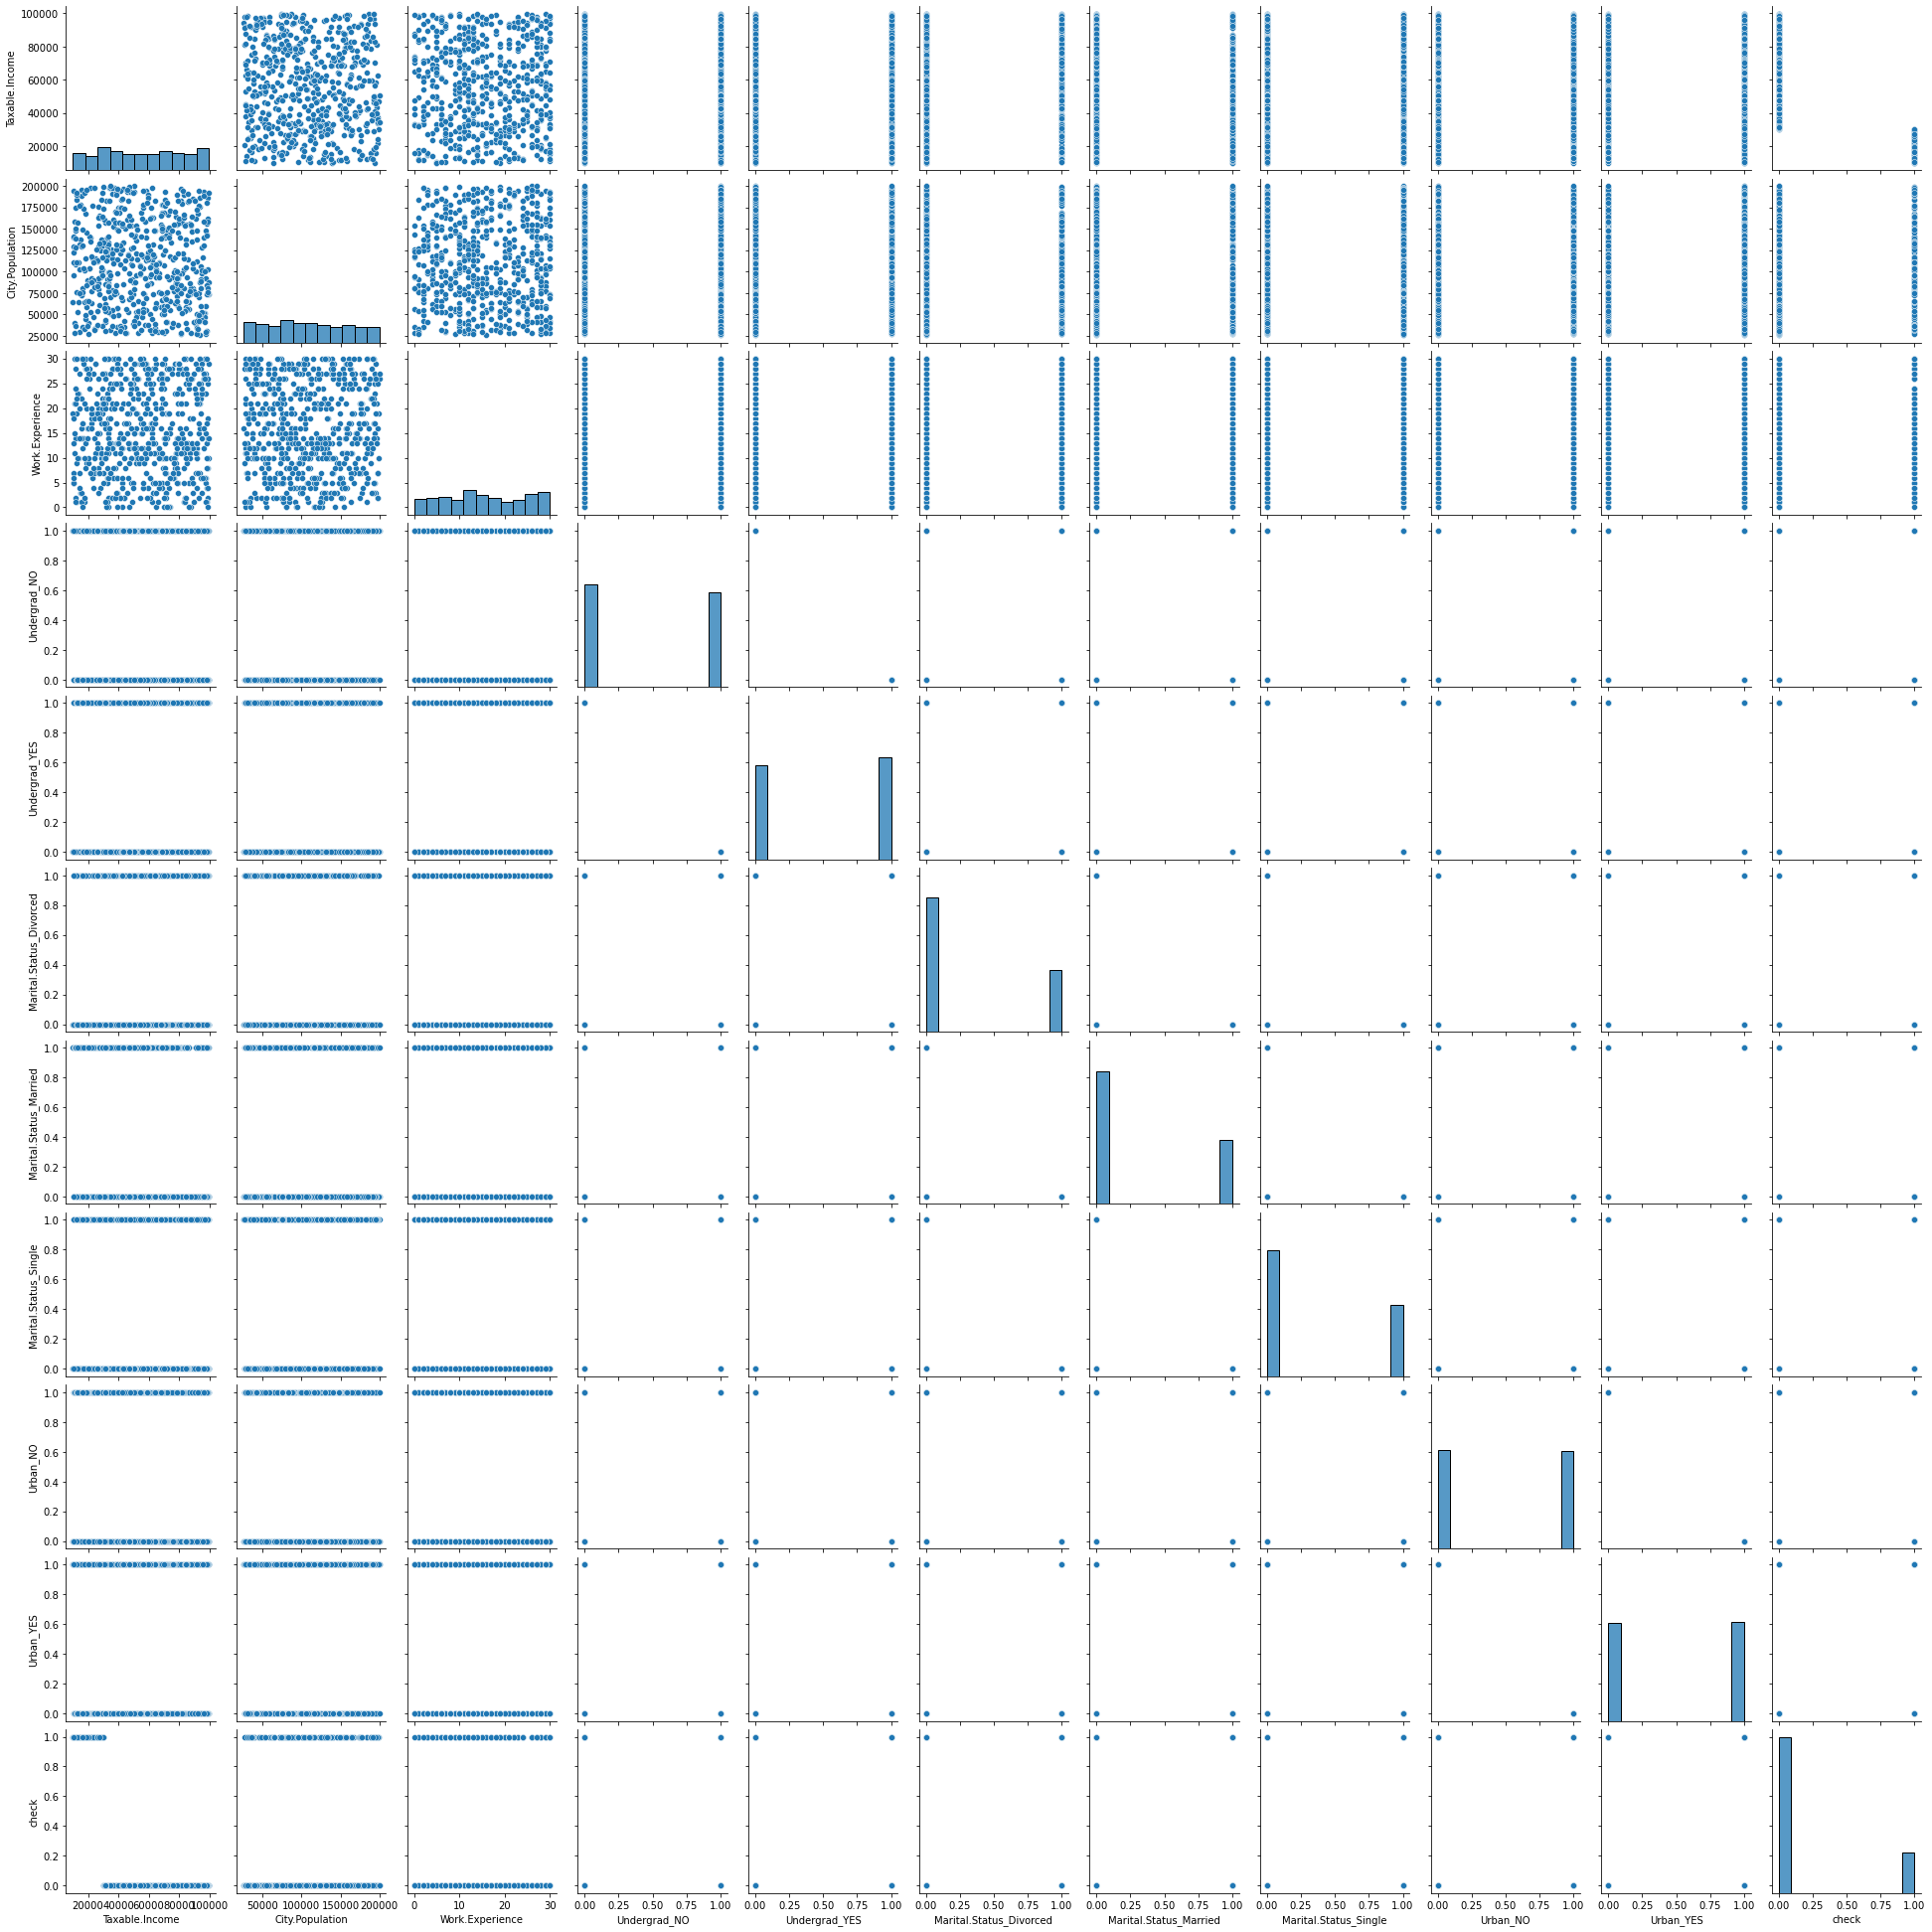

In [18]:
import seaborn as sns
sns.pairplot(df1)

In [19]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [20]:
df1

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES,check
0,68833,50047,10,1,0,0,0,1,0,1,0
1,33700,134075,18,0,1,1,0,0,0,1,0
2,36925,160205,30,1,0,0,1,0,0,1,0
3,50190,193264,15,0,1,0,0,1,0,1,0
4,81002,27533,28,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
595,76340,39492,7,0,1,1,0,0,0,1,0
596,69967,55369,2,0,1,1,0,0,0,1,0
597,47334,154058,0,1,0,1,0,0,0,1,0
598,98592,180083,17,0,1,0,1,0,1,0,0


In [21]:
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [22]:
df2 = norm_func(df1.iloc[:,0:11])

In [23]:
X=df2.iloc[:,1:10].values
y=df2.iloc[:,-1].values

In [24]:
X

array([[0.13947207, 0.33333333, 1.        , ..., 1.        , 0.        ,
        1.        ],
       [0.62239438, 0.6       , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.77256766, 1.        , 1.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.73723987, 0.        , 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.88680969, 0.56666667, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.76068253, 0.53333333, 1.        , ..., 0.        , 1.        ,
        0.        ]])

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=48)

In [26]:
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier(n_estimators=60,criterion='gini',max_depth=8)

In [27]:
model.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, n_estimators=60)

In [28]:
from sklearn.metrics import accuracy_score,confusion_matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[142,   6],
       [ 32,   0]], dtype=int64)

In [29]:
accuracy_score(y_test,y_pred)

0.7888888888888889

# Apply K-Fold Testing

In [30]:
from sklearn.model_selection import KFold,cross_val_score

In [31]:
kfold = KFold(n_splits=10)
model1 = RandomForestClassifier(n_estimators=20,criterion="entropy",max_depth=3)
result = cross_val_score(model1,X,y,cv=kfold)

In [32]:
result

array([0.78333333, 0.76666667, 0.71666667, 0.75      , 0.81666667,
       0.71666667, 0.9       , 0.75      , 0.85      , 0.88333333])

In [33]:
result.mean()*100

79.33333333333333

# Hyperparater Tuning with Grid Search


In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
model2 = RandomForestClassifier()

In [36]:
param = [{"n_estimators":[20,30,50], "criterion":["gini","entropy"],"max_depth":[3,5,7,8]}]

In [37]:
grf = GridSearchCV(model2,param_grid=param,cv=10)

In [38]:
grf.fit(X,y)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [3, 5, 7, 8],
                          'n_estimators': [20, 30, 50]}])

In [39]:
grf.best_params_

{'criterion': 'gini', 'max_depth': 3, 'n_estimators': 20}

In [40]:
grf.best_score_

0.7933333333333333

In [41]:
kfold = KFold(n_splits=10)
model4 = RandomForestClassifier(n_estimators=20,criterion="gini",max_depth=3)
result = cross_val_score(model4,X,y,cv=kfold)

In [42]:
result.mean()*100

79.33333333333333

In [43]:
result.std()*100

6.289320754704403

In [44]:
result.min(),result.max()

(0.7166666666666667, 0.9)

In [154]:
result

array([0.78333333, 0.76666667, 0.71666667, 0.75      , 0.81666667,
       0.71666667, 0.9       , 0.75      , 0.85      , 0.88333333])